## Introduction and problem statement 
Every month BankCo loses thousands of customers to its competitors. The customers who leave the bank are known as 'churned customers'. In this chalenge, I will predict the customers who are likely to leave BankCO so that BankCo can take masures to make those customers stay by prioritising marketing efforts on those who are likely to churn.

## 1. Data preparation and analysis

####  Importing relevant libraries that will be used

In [3]:
import os #accessing directory structure
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #plotting
import matplotlib.pyplot as plt # plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn import metrics #metrics selection
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import classification_report
from sklearn import model_selection #model selection
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.tree import DecisionTreeClassifier #Decision Trees
from sklearn.ensemble import RandomForestClassifier #random forests
from sklearn.model_selection import cross_val_score #Cross validarion import
from sklearn.metrics import accuracy_score #Accuracy of models
from sklearn.model_selection import train_test_split #Import train_test_split from sklearn library


## 2. Loading the dataset


In [4]:
#Importing data
churn_data = pd.read_csv('D:/ML/predicting-churn-for-bank-customers/Churn_Modelling.csv', delimiter=',')

#Giving the dataframe a name
churn_data.dataframeName = 'Churn_Modelling.csv'

#Computing the number of rows and columns
nRow, nCol = churn_data.shape

#Displays the number of rows(10 000) and columns (14)
print(f'The dataset has {nRow} rows and {nCol} columns')
churn_data.head()

The dataset has 10000 rows and 14 columns


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Dataset information 

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* As it can be seen using the cells above, the data set has 10000 non-null rows which is the number of observations and 14 non-null columns   which is the number of features. Features with non_numericl values will be encoded into numbers.

* The last column 'Exited' is the target column, this implies that this is a **Supervised Learning** problem

This is a binary classification analysis where customers will be split into two subsets; churners ie those who a re likely to leave the Bank and non-churners, that is those who will stay with bank. To achieve this, different classification algorithms such as **K-Nearest Neighbours, Logistic Regression, Support Vector Machines, Decision Trees, Random Forests and Gaussian Naive bayes** will be used and the best classifier will be selected.

In [6]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##  3.Data visualization

#### The following function plot distribution graphs

In [7]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


#### Function for computing and displaying the correlation matrix

In [8]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [9]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


The ratio of the number of exited cutomers to the ones that stayed

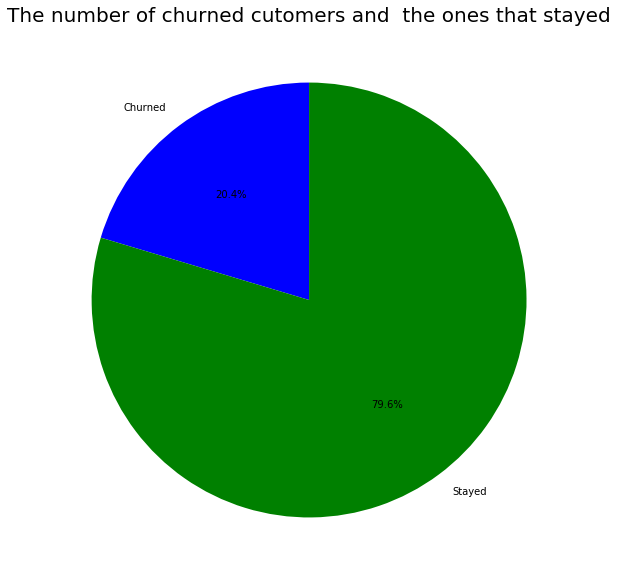

In [10]:
slices=  [churn_data.Exited[churn_data.Exited ==1].count(), 
          churn_data.Exited[churn_data.Exited == 0].count()]
slice_labels = ['Churned', 'Stayed']
colours = ['b', 'g']
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(slices, labels = slice_labels, colors = colours, startangle= 90, autopct='%.1f%%')
plt.title("The number of churned cutomers and  the ones that stayed", size = 20)
plt.show()

As it can be seen on the pie chart above, 79.6% of the records of the dataset represent customers who stayed and 20.4% are those who churned. This reprents  a  risk of predicting in favor of the majority subset which represents the customers who stayed. Therefore before modelling the minority subset (churned) will be upsampled in order to balance our dataset. 


Distribution graphs (histogram/bar graph) of sampled columns:

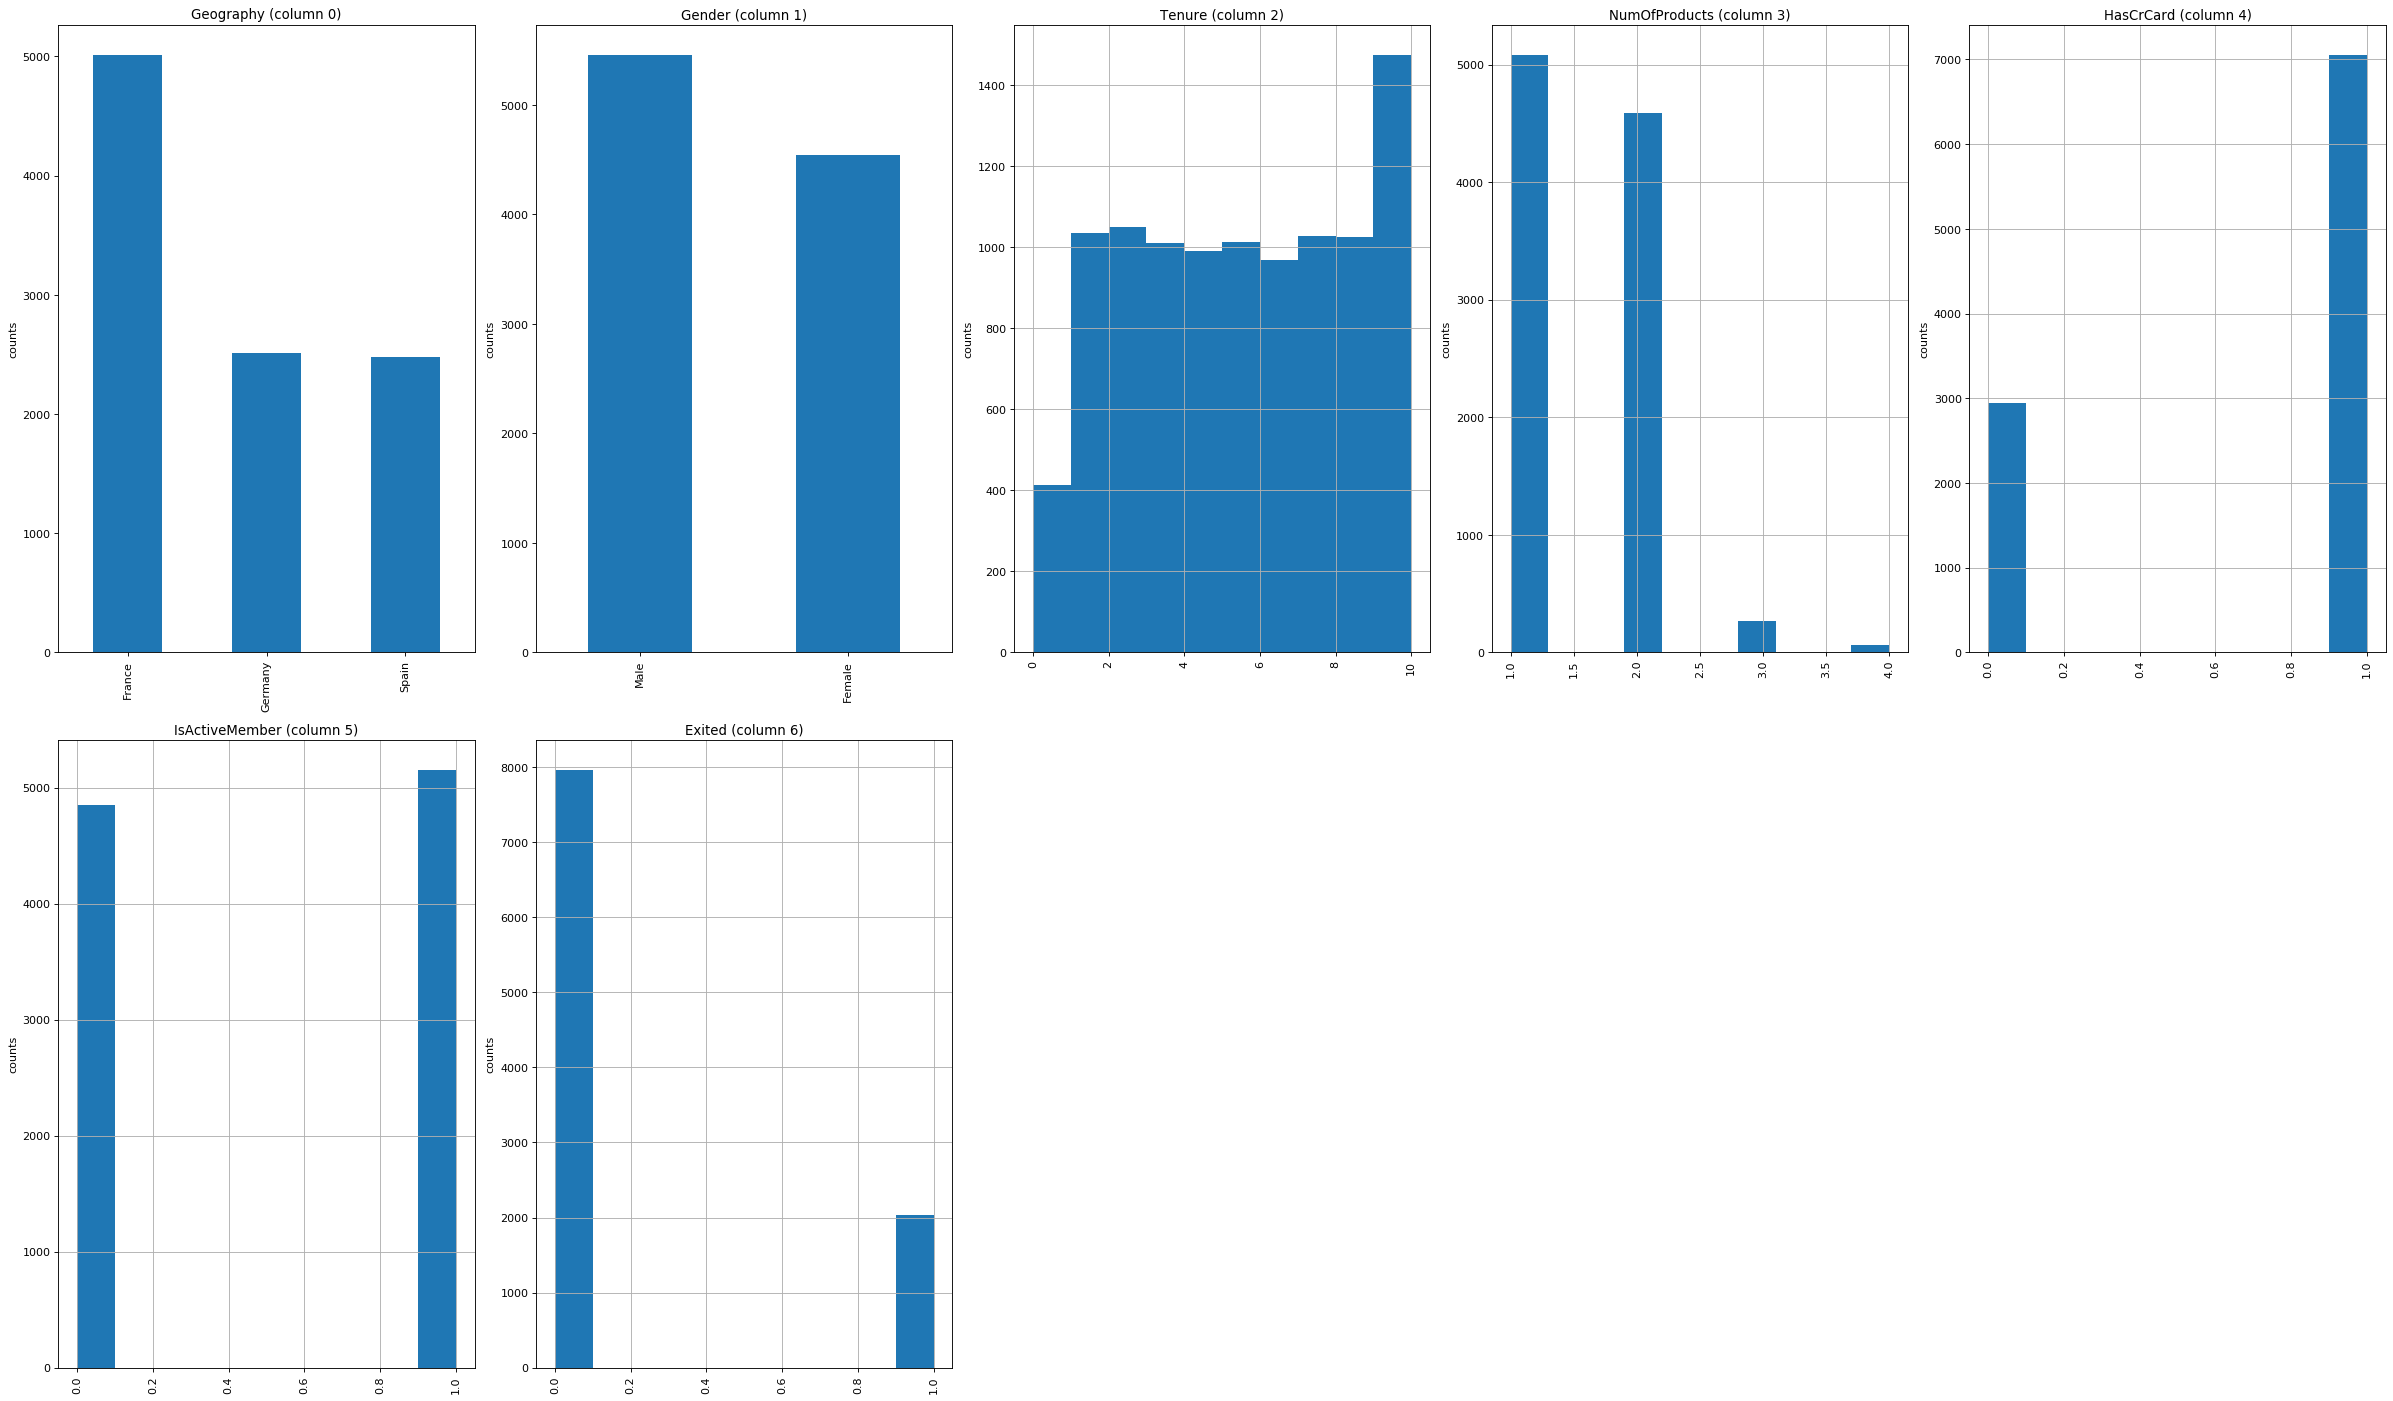

In [11]:
plotPerColumnDistribution(churn_data, 10, 5)

#### Plotting  features mostly categorical with unique values < 50  siding with the target value

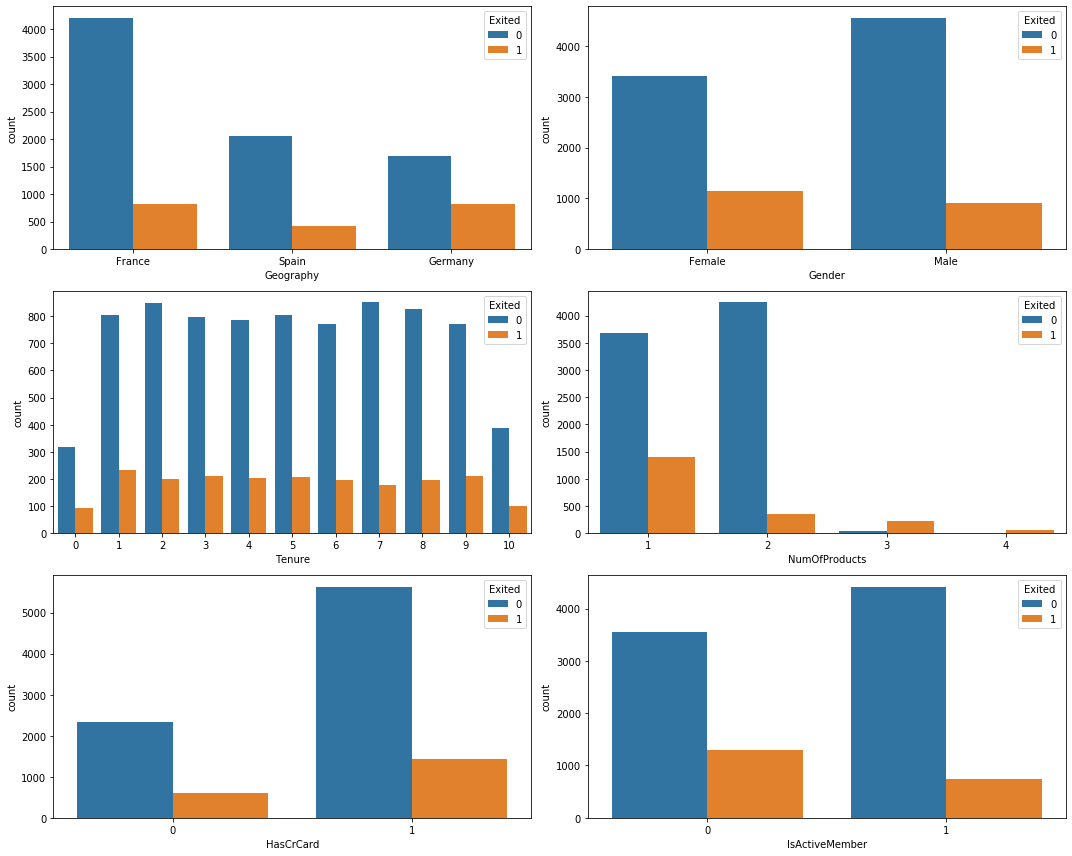

In [12]:
# using seaborn library for visualization
plot, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# extracting features with unique values that are between 2 and 49
nunique = churn_data.nunique()

# array of categorical features
cat_features = [col for col in churn_data.columns if nunique[col] >= 1 and nunique[col] < 50]

# array of non-categorical non_categorical
num_features = [col for col in churn_data.columns if nunique[col] > 50]

# looping through the array of categorical features and plotting their counts with the target variable
for axis, catplot in zip(axes, churn_data.dtypes[cat_features].index):
    sns.countplot(x=catplot, hue = 'Exited', data=churn_data, ax=axis)   
plt.tight_layout()  
plt.show()  


**The following observations can be seen from the graphs above**
* It can be seen that the majority of customers come from France, followed by Spain and Germany in the last place. Despite Germany having approximately half the number of customers of France, both countries have almost equal the number of curners. This implies that Germany has the highest ratio of churners

* The number of female churners is greater than the male's,  despite the number of male customers being greater than that of females.

* Non active customers churn at a higher rate than active onesDistribution graphs (histogram/bar graph) of sampled columns:

Correlation matrix:

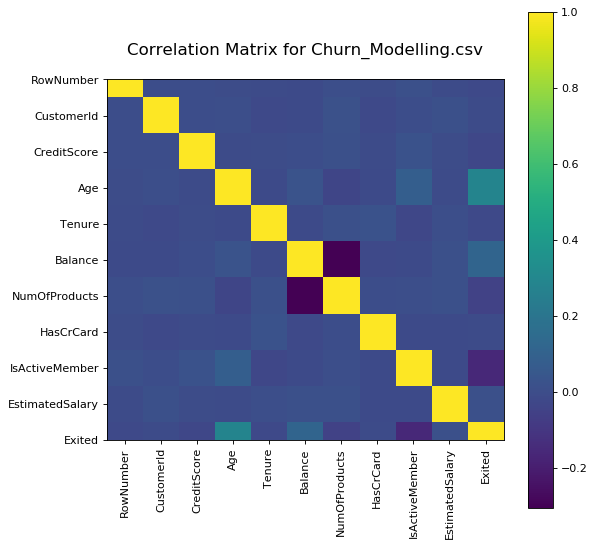

In [13]:
plotCorrelationMatrix(churn_data, 8)

The correlation matrix shows correlation between Age, isActiveMember, Balance with our the target variable. There is no strong correlation among the explanatory variables thus there will not be a need to avoid strongly correlated explanatory variables in modelling. 

## 4. Data processing and feature engineering

### Dropping features that will not be used and creating dummy variables
First, I start by dropping columns taht will not contribute in prediction modelling and then create 
dummy variables from categorical variables.

In [14]:
# Dropping RowNumber CustomerId Surname   
churn_data1 = churn_data.drop(["RowNumber", "CustomerId","Surname"], axis=1)

# Creating dummy variables from categorical variables
churn_data2 = pd.get_dummies(churn_data1, columns=['Gender','Geography'])


In [15]:
#New dataset after creating dummy variables
churn_data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [16]:
#Renaming dummy variables created from Gender ang Geography columns
churn_data2.rename(columns={"Gender_Female": "Female", "Gender_Female": "Male","Geography_France":"France",
                                      "Geography_Spain": "Spain","Geography_Germany":"Germany"}, inplace=True)
churn_data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Gender_Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


### Dealing with imbalanced dataset
As the pie chart in section 3 (Data visualisation) shows, our dataset is imbalanced 79.6 % of records belong to one class (Exited/churned) to  avoid overfitting to the majority class, the dataset will be balanced by upsampling the minority class.

In [17]:
churn_data2.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
# upsampling the minority class so that it has the same number of records as the mijority
churn_balanced = resample(churn_data2[churn_data2.Exited ==1],replace=True,n_samples= 7963,random_state=1) #set the seed for random resampling
churn_balanced = pd.concat([churn_data2[churn_data2.Exited ==0], churn_balanced])

In [19]:
churn_balanced.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Now we have a balanced dataset 

#### Feature extraction

From imbalanced dataset

In [20]:
# Explanatory variable from unbalanced dataset
# Explanatory variable
X = churn_data2.loc[:,churn_data2.columns != 'Exited']

# Target variable
Y = churn_data2.loc[:,churn_data2.columns == 'Exited']

From the balanced dataset

In [21]:
# Explanatory variable from the balanced dataset
# Explanatory variable
X_balanced = churn_balanced.loc[:,churn_balanced.columns != 'Exited']

# Target variable
Y_balanced = churn_balanced.loc[:,churn_balanced.columns == 'Exited']

## 5. Predictive modelling

For this stage, different classification models mentioned in the introduction will be used to predict whether a given customer will or not churn.
To do that, our dataset will be shuffled and split into train and test data, the former is 80% and latter 20 % of total records.


In [22]:
#splitting into training and testing datasets from both balanced and unbalanced datasets

#imbalanced
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

#balanced
X_trainb, X_testb, Y_trainb, Y_testb = train_test_split(X_balanced, Y_balanced, test_size=0.2) 

### Logistic Regression
Logistic Regression is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that a given customer will churn?). If the estimated probability is greater than 50%, then the model predicts that the customer will churn (positive class, labeled “1”), or else it predicts that the customer does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

#### On imbalanced data

In [23]:
#fitting a the Logistic regression model on unbalanced dataset
logregit = LogisticRegression()
logregit.fit(X_train, Y_train.values.ravel())

#predicting 
Y_pred = logregit.predict(X_test)
accuracy = accuracy_score(Y_pred, Y_test)*100
print('Accuracy of LogisticRegression: {:.2f} %'.format(accuracy))
print(classification_report(Y_test, Y_pred))


Accuracy of LogisticRegression: 80.40 %
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1606
           1       0.67      0.01      0.02       394

    accuracy                           0.80      2000
   macro avg       0.74      0.50      0.46      2000
weighted avg       0.78      0.80      0.72      2000



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Balanced data

In [24]:
#fitting a the Logistic regression model
logregitb = LogisticRegression()
logregitb.fit(X_trainb, Y_trainb.values.ravel())

#predicting 
Y_predb = logregitb.predict(X_testb)
accuracy = accuracy_score(Y_predb, Y_testb)*100
print('Accuracy of LogisticRegression: {:.2f} %'.format(accuracy))
print(classification_report(Y_testb, Y_predb))

Accuracy of LogisticRegression: 67.83 %
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1563
           1       0.68      0.69      0.69      1623

    accuracy                           0.68      3186
   macro avg       0.68      0.68      0.68      3186
weighted avg       0.68      0.68      0.68      3186



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 **Metrics used**


**Precision**:  This a measure of a classifier's exactness, i.e., the ability of a classifier to give correct labels.

**Recall**: A measure of a classifiers completeness, i.e., the ability of a classifier to find all samples that belong a certain class.

  **F1 Score (or F-score)**: A weighted average of precision and recall.
  
  As the results above show, eventhough the unbalanced dataset gives a higher accuracy, the precion and recall values are only high  for the majority class( class of those who did not churn) and very low for the minority class. This questions the ability of the model to predict that a customer will churn.
  
Despite having a lower accuracy, the Logistic Regression model trained on balanced data gives balanced precision and recall values for both the majority and minority classes.

### Decision Trees  
Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks. They are very powerful algorithms, capable of fitting complex datasets.

**On balanced dataset**

In [25]:
#Decision tree classifier
dtreeb = DecisionTreeClassifier(max_depth=5)

#Training the decision tree classifier on a balanced dataset using all features
dtreeb.fit(X_trainb, Y_trainb)

#predicting 
Y_pred = dtreeb.predict(X_testb)
accuracy = accuracy_score(Y_predb, Y_testb)*100
print('Accuracy of DecisionTreeClassifier: {:.2f}'.format(accuracy))
print(classification_report(Y_testb, Y_predb))

Accuracy of DecisionTreeClassifier: 67.83
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1563
           1       0.68      0.69      0.69      1623

    accuracy                           0.68      3186
   macro avg       0.68      0.68      0.68      3186
weighted avg       0.68      0.68      0.68      3186



**on original (imbalanced) dataset**

In [26]:
#Decision tree classifier
dtree = DecisionTreeClassifier(max_depth=5)

#Training the decision tree classifier
dtree.fit(X_train, Y_train)

#predicting 
Y_pred = dtree.predict(X_test)
accuracy = accuracy_score(Y_pred, Y_test)*100
print('Accuracy of DecisionTreeClassifier: {:.2f}'.format(accuracy))
print(classification_report(Y_test, Y_pred))

Accuracy of DecisionTreeClassifier: 85.05
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1606
           1       0.67      0.47      0.55       394

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Decision trees gives overall better performance than Logistic Regression on both balanced and original data sets with higher precision and recall scores. Therefore, DecisionTreeClassifier is a better classifier than Logistic Regression.
Let's see how it holds against Random Forests!

### RandomForests

Random Forests is an ensemble of Decision Trees which averages multiple Decision Trees that suffer from high variance. Random Forests build  more robust model that has better generalisation performance.

**On original (imbalanced) dataset**

In [27]:
#Random forest classifier
randForest = RandomForestClassifier()

#Training the decision tree classifier
randForest.fit(X_train, Y_train.values.ravel())

#predicting 
Y_pred = randForest.predict(X_test)
accuracy = accuracy_score(Y_pred, Y_test.values.ravel())*100
print('RandomForestClassifier: {:.2f}'.format(accuracy))
print(classification_report(Y_test, Y_pred))

RandomForestClassifier: 85.35
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1606
           1       0.72      0.42      0.53       394

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


** On balanced dataset**

In [28]:
#Random forest classifier
randForestb = RandomForestClassifier()

#Training the decision tree classifier
randForestb.fit(X_trainb, Y_trainb)

#predicting 
Y_predb = randForest.predict(X_testb)
accuracy = accuracy_score(Y_predb, Y_testb.values.ravel())*100
print('RandomForestClassifier: {:.2f}'.format(accuracy))
print(classification_report(Y_testb, Y_predb))

RandomForestClassifier: 91.31
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1563
           1       0.99      0.84      0.91      1623

    accuracy                           0.91      3186
   macro avg       0.92      0.91      0.91      3186
weighted avg       0.92      0.91      0.91      3186



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


## Conclusion
As concludion, from the analysis done on this data set, it was seen groups such as Germany and Female have a higher ratio 
of customers who churned. After analysis, different classifiers were used and it was proved that Random Forests presented 
an overall better performance on both balanced (**86 % accuracy**) and imbalanced (**91.56 accuracy%**)  datasets in predicting whether or not customers will churn. 
Thus Random Forests is better classifier for this problem.

**End**